## Import

In [15]:
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import randint
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.simplefilter("ignore")

## Load the dataset from 'heart.csv' into a Pandas DataFrame

In [16]:
import pandas as pd

ha_df = pd.read_csv(r"D:\heart.csv")
ha_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Understanding

In [17]:
# Display the column names in the dataset
ha_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Explanation of all columns in the dataset:

### - 'age': age of the patient
### - 'sex': sex of the patient
### - 'cp': chest pain type (0=typical angina, 1=atypical angina, 2=non-anginal pain, 3=asymptomatic)
### - 'trtbps': resting blood pressure in mm Hg
### - 'chol': cholesterol in mg/dl
### - 'exng': exercise-induced angina (1=yes, 0=no)
### - 'fbs': fasting blood sugar > 120 mg/dl (1=true, 0=false)
### - 'restecg': resting electrocardiographic results (0=normal, 1=ST-T wave abnormality, 2=left ventricular hypertrophy)
### - 'thalachh': maximum heart rate achieved
### - 'slp': slope
### - 'caa': number of major vessels
### - 'thall': thallium stress test result
### - 'output': target (0=less chance of heart attack, 1=more chance of heart attack)

## Data Preparation

In [18]:
# Check data information, data types, and missing values
ha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### list of categorical columns for value checking 

In [19]:
categoric_cols = ['sex', 'cp', 'fbs', 'restecg',
                  'exng', 'slp', 'caa', 'thall']

In [20]:
# Check all unique values in categorical columns

for i in categoric_cols:
    if i in ha_df.columns:
        print('All values in column {0} : \n{1}'.format(i, ha_df[i].value_counts().sort_index()))
        print('\n')
    else:
        print(f'Column {i} not found in the DataFrame.')

# Print the list of categorical columns
print('Categorical columns:', categoric_cols)

All values in column sex : 
sex
0    312
1    713
Name: count, dtype: int64


All values in column cp : 
cp
0    497
1    167
2    284
3     77
Name: count, dtype: int64


All values in column fbs : 
fbs
0    872
1    153
Name: count, dtype: int64


All values in column restecg : 
restecg
0    497
1    513
2     15
Name: count, dtype: int64


Column exng not found in the DataFrame.
Column slp not found in the DataFrame.
Column caa not found in the DataFrame.
Column thall not found in the DataFrame.
Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']


## Outliers using boxplots and remove data points outside 1.5*IQR

In [23]:
print(ha_df.columns.tolist())

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


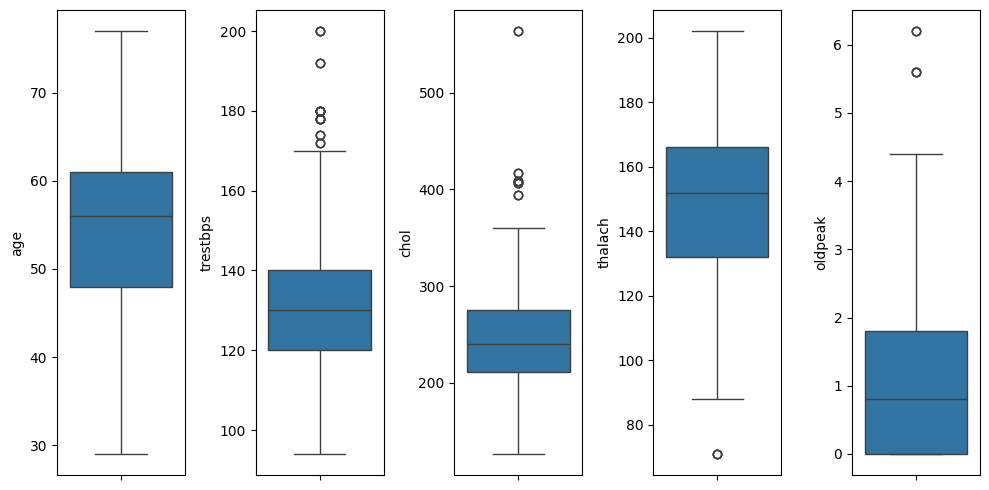

In [24]:
col_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=ha_df[col_num[i]])
    plt.tight_layout()

In [25]:
for i in col_num:
    Q1 = ha_df[i].quantile(0.25)
    Q3 = ha_df[i].quantile(0.75)
    IQR = Q3-Q1
    LowerBound = Q1 - (1.5 * IQR)
    UpperBound = Q3 + (1.5 * IQR)

    ha_df = ha_df[(ha_df[i] >= LowerBound)&(ha_df[i] <= UpperBound)]

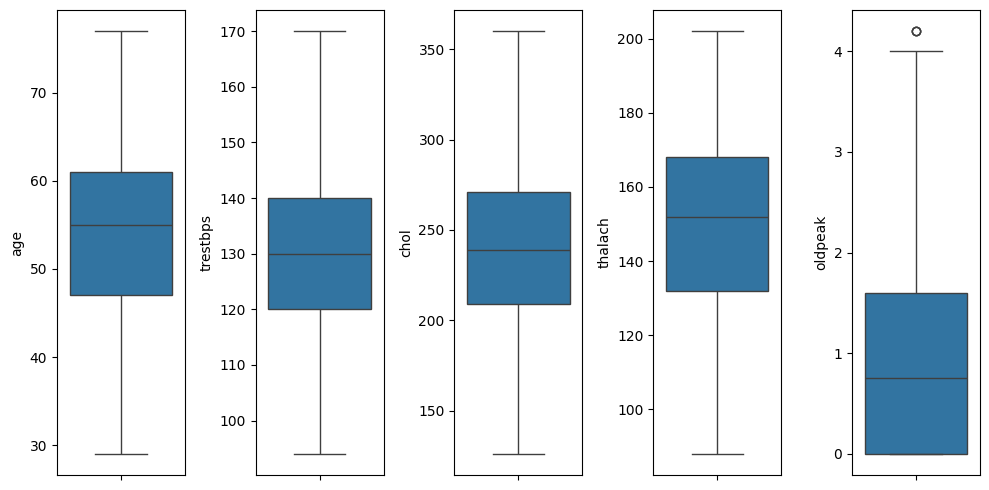

In [27]:
# Check outliers after handling

col_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = ha_df[col_num[i]])
    plt.tight_layout()

In [29]:
ha_df.shape

(964, 14)

In [30]:
# Missing values
ha_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
# Duplicate data
ha_df.duplicated().sum()

np.int64(680)

In [32]:
# Remove duplicate rows
ha_df = ha_df.drop_duplicates()

In [33]:
# Check for duplicate data after removal
ha_df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

In [34]:
# Describe statistics for selected numeric columns
ha_df[col_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,284.0,54.038732,9.113841,29.0,47.00,55.0,60.0,77.0
trestbps,284.0,129.919014,15.372310,94.0,120.00,130.0,140.0,170.0
chol,284.0,242.510563,44.697530,126.0,210.75,239.5,271.0,360.0
thalach,284.0,149.862676,22.712183,88.0,132.75,153.0,168.0,202.0
oldpeak,284.0,0.963380,1.042556,0.0,0.00,0.6,1.6,4.2


In [35]:
df = ha_df

In [36]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Count Plot

In [39]:
# Count plot for categorical columns
count = ['sex', 'cp', 'fbs', 'restecg','exang','slope', 'ca', 'thal', 'target']

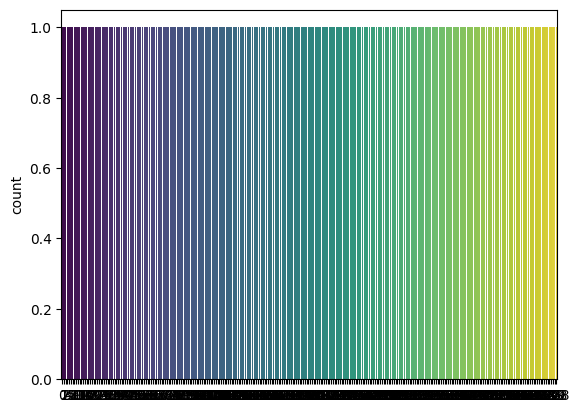

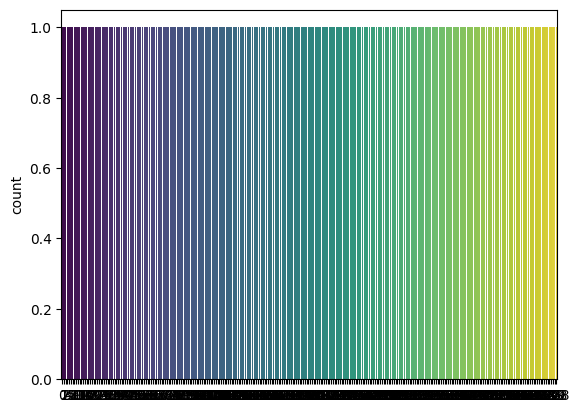

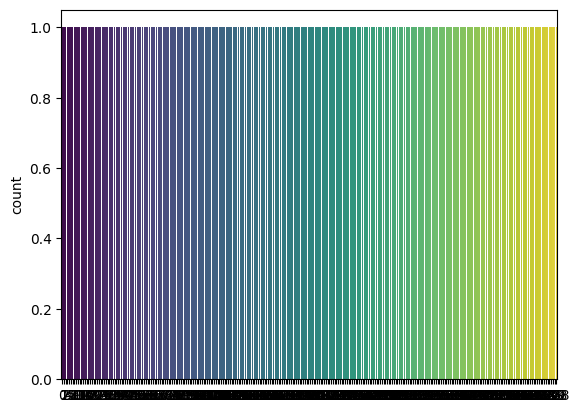

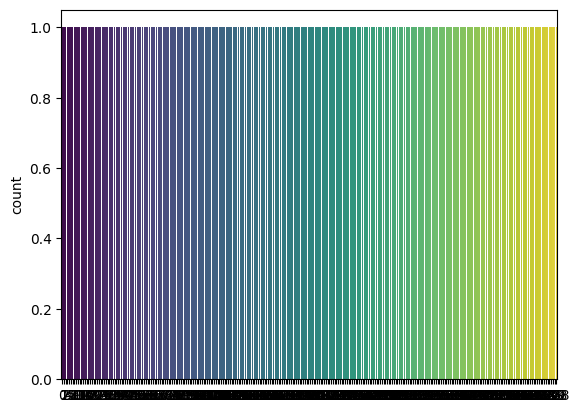

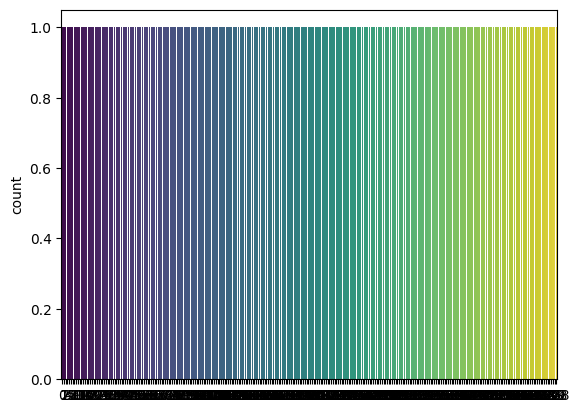

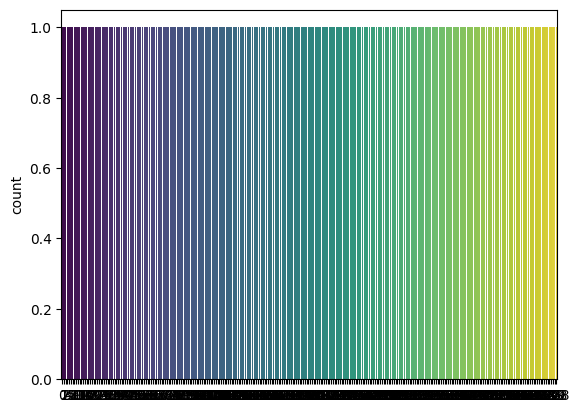

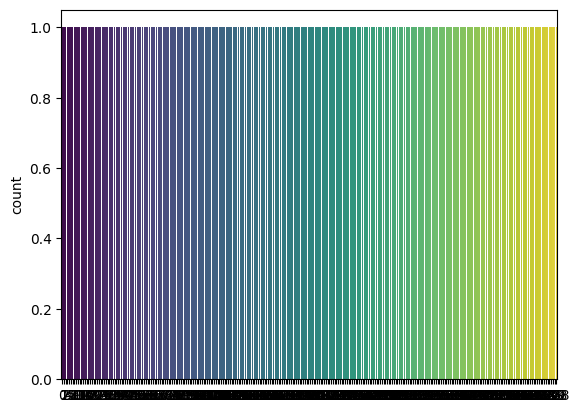

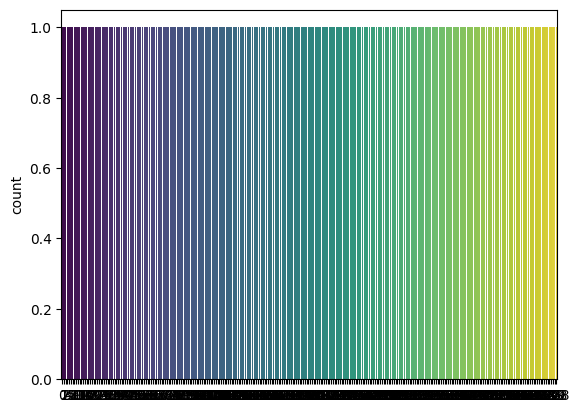

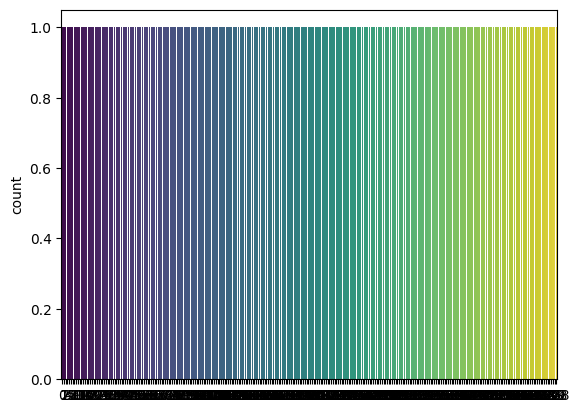

In [40]:
for i in count:
    sns.countplot(df[i], palette = 'viridis')
    plt.show()

## Histograms for selected numeric columns

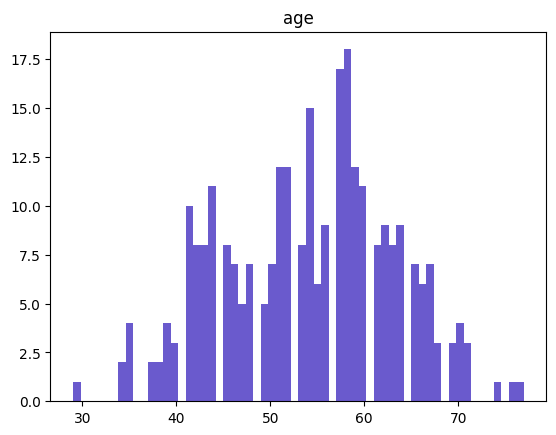

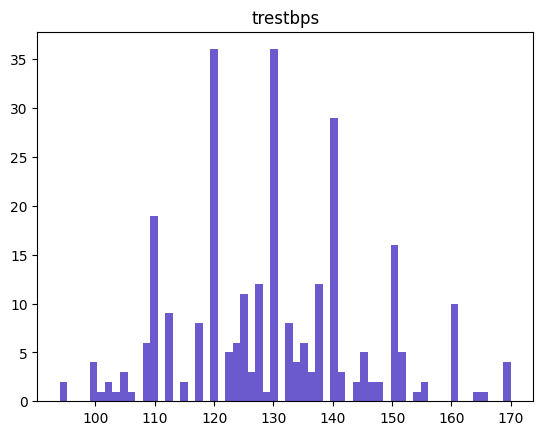

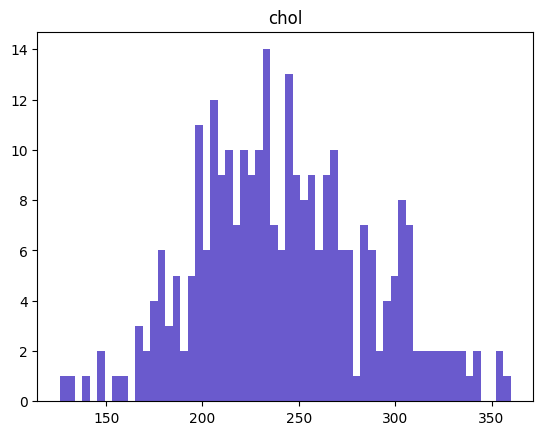

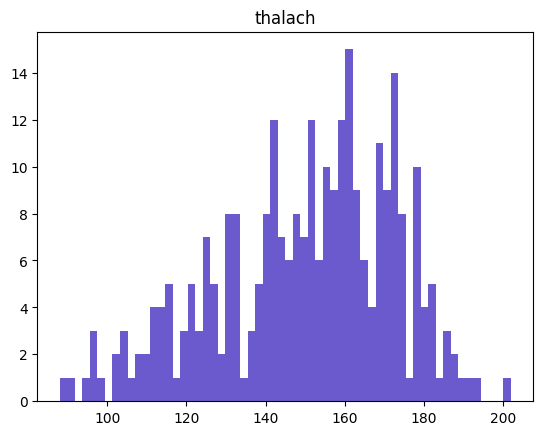

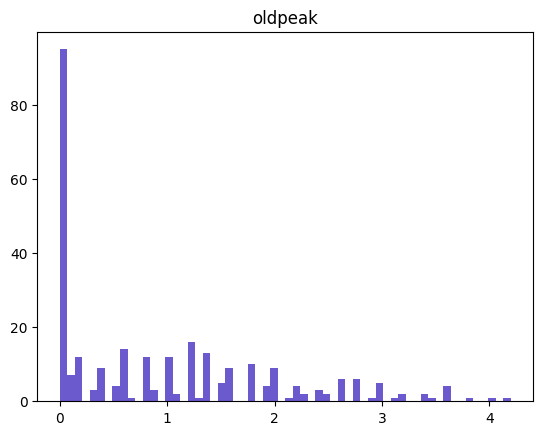

In [42]:
i = ['age', 'trestbps', 'chol','thalach','oldpeak']
for j in i:
    plt.hist(df[j],bins = 60, color = 'slateblue')
    plt.title(j)
    plt.show()

## Checking for Multicollinearity and Feature Selection

In [44]:
!pip install statsmodels


# Import variance_inflation_factor function from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)

# Sort and Display the output
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 364.6 kB/s eta 0:00:25
   --- ------------------------------------ 0.8/9.6 MB 541.1 kB/s eta 0:00:17
   ---- ----------------------------------- 1.0/9.6 MB 679.7 kB/s eta 0:00:13
   ---- ----------------------------------- 1.0/9.6 MB 679.7 kB/s eta 0:00:13
   ----- ---------------------------------- 1.3/9.6 MB 670.9 kB/s eta 0:00:13
   ----- ---------------------------------- 1.3/9.6 MB 670.9 kB/s eta 0:00:13
   ------ --------------------------------- 1.6/9.6 MB 676.3 kB/s eta 0:00:12
   ------ ------------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,feature,VIF
3,trestbps,67.679163
7,thalach,48.940897
0,age,40.848486
4,chol,32.335727
12,thal,17.694901
10,slope,10.235945
13,target,4.537366
1,sex,4.042962
9,oldpeak,3.005968
2,cp,2.614668


## Remove columns with VIF greater than the limit (VIF limit = 11)
### This step is repeated for different columns
ha_df.drop(columns=['trtbps'], inplace=True)

In [46]:
# drop column 'trtbps' (vif > 11)
df.drop(columns = ['trestbps'], inplace = True)

In [48]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
6,thalach,40.165324
3,chol,31.121735
0,age,29.168549
11,thal,17.629223
9,slope,10.228946
12,target,4.537283
1,sex,4.020783
8,oldpeak,2.941890
2,cp,2.596056
5,restecg,2.168715


In [49]:
# drop column 'thalachh' (vif > 11)
df.drop(columns = ['thalach'], inplace = True)

In [50]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
0,age,28.358653
3,chol,26.281440
10,thal,16.430939
8,slope,9.104354
11,target,4.035806
1,sex,3.784810
7,oldpeak,2.918133
2,cp,2.551562
5,restecg,2.154113
6,exang,2.037188


In [51]:
# drop column 'age' (vif > 11)
df.drop(columns = ['age'], inplace = True)

In [52]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
2,chol,18.028358
9,thal,15.427588
7,slope,8.925121
10,target,3.934283
0,sex,3.780956
6,oldpeak,2.745825
1,cp,2.528143
4,restecg,2.151138
5,exang,2.029645
8,ca,1.871821


In [53]:
# drop column 'chol' (vif > 11)
df.drop(columns = ['chol'], inplace = True)

In [54]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
8,thal,10.651601
6,slope,7.535875
0,sex,3.776211
9,target,3.710899
5,oldpeak,2.587676
1,cp,2.508289
3,restecg,2.142278
4,exang,1.967277
7,ca,1.847577
2,fbs,1.218204


In [55]:
df.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target'],
      dtype='object')

Pearson Correlation,


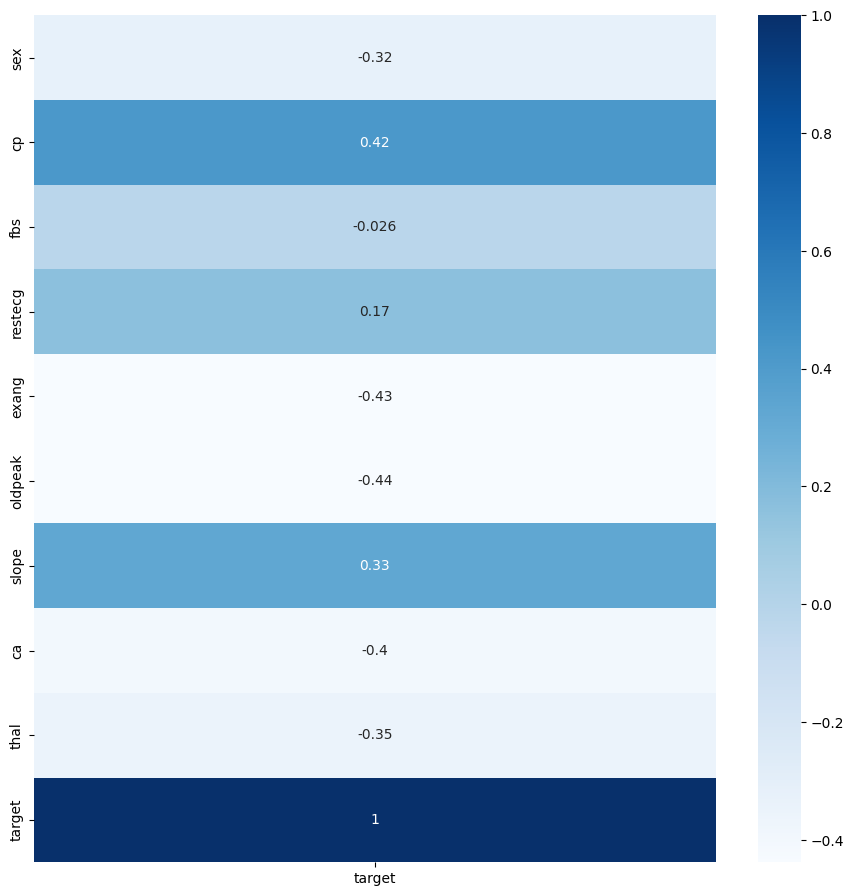

abs corr score: 
sex        0.320535
cp         0.418503
fbs        0.025539
restecg    0.167148
exang      0.434788
oldpeak    0.437985
slope      0.328277
ca         0.402236
thal       0.352109
Name: target, dtype: float64


mean 0.3207910907795114


feature selection result: 
cp         0.418503
exang      0.434788
oldpeak    0.437985
slope      0.328277
ca         0.402236
thal       0.352109
Name: target, dtype: float64


In [57]:
print('Pearson Correlation,')
plt.figure(figsize = (11,11))
cor = df.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('abs corr score: ')
print(abs(cor['target'][0:-1]))
cor['tsrget'] = cor['target'][0:-1]
margin = abs(cor['target'][0:-1]).mean()

print('\n')

print('mean {0}'.format(margin))

print('\n')

print('feature selection result: ')
fs = abs(cor['target'][0:-1])[abs(cor['target']) > margin]
print(fs)

In [58]:
df = df.drop(columns = ['sex', 'fbs', 'restecg', 'slope'])

In [60]:
df.columns

Index(['cp', 'exang', 'oldpeak', 'ca', 'thal', 'target'], dtype='object')

In [61]:
df.head()

,cp,exang,oldpeak,ca,thal,target
0,0,0,1.0,2,3,0
1,0,1,3.1,0,3,0
2,0,1,2.6,0,3,0
3,0,0,0.0,1,3,0
4,0,0,1.9,3,2,0
